# SQDMetal Component gallery

This notebook provides a minimum working examples of all available components in SQDMetal. Note:

- The code can be copied and pasted as a template
- The `import` statement is in the first line while the code for the main component(s) is enclosed within the comments `###`
- The options in the demonstrations are NOT exhaustive. Full list of parameters for finer adjustments can be found in the docstring (e.g. just run `CapacitorInterdigital?`)

Basic components include:

- [Capacitors](#cap)
    - [Interdigital capacitors](#cap-inter)
    - [Gap capacitors](#cap-gap)
    - [Gap meander capacitors](#cap-gap-meander)
    - [Prong capacitors on pin](#cap-prongs)
- [Inductors](#ind)
    - [Meander inductors](#ind-mean)
- [Resonators](#res)
    - [Meander resonators](#res-mean)
- [Markers](#markers)
    - [Dicing cross](#markers-dice-cross)
    - [Square marker](#markers-square)
    - [Quadruple square marker](#markers-square)
- [Bandages](#bandages)
    - [Rectangular patches](#bandages-rectangle)
    - [Tapered patches](#bandages-tapered)
- [Text Labels](#text-labels)

Specialised routing constructs to ease wiring and positioning:

- [Joints](#joints)
    - [Basic isolated pin](#joints-joint)
    - [Extending pin off another pin](#joints-jointextend)
    - [Pin on side of wire/routing object](#joints-route)
- [Wires](#wires)
    - [Wire extending off a pin](#wire-pinstretch)
    - [Manual wire routing through pins](#wire-wirepins)
    - [Parallel connecting S-elbow wire](#wire-S)
    - [Single elbow connector](#wire-elbow)
    - [Wire taper (to change wire size)](#wire-taper)
    - [Wire dual-probe taper](#wire-dual-probe-taper)

Qubit-related components include:

- [Xmon](#xmon)
    - [Basic Xmon](#xmon-basic)
- [Flux lines](#flux-lines)
    - [T-junction flux line](#flux-lines-T)
- [Josephson junctions](#jjunctions)
    - [Dolan bridge](#jjunctions-dolan)
    - [Asymmetric Dolan bridge](#jjunctions-dolan-asym)

More specialised structures include:

- [Bounds](#bounds)
    - [Rectangular bound](#bounds-rectangle)
    - [Ground shields](#bounds-gndshield)
- [Holes](#holes)
    - [Holes on borders](#holes-basic)

*To regenerate this notebook, run this initialisation cell first*.

In [1]:
%load_ext autoreload
%autoreload 2
from qiskit_metal import designs
from SQDMetal.Utilities.QUtilities import QUtilities
import matplotlib.pyplot as plt
import numpy as np
from qiskit_metal.toolbox_python.attr_dict import Dict
design = designs.DesignPlanar({}, overwrite_enabled=True)
%matplotlib inline

## Capacitors  <a class="anchor" id="cap"></a>

### Interdigital capacitors  <a class="anchor" id="cap-inter"></a>

Using absolute coordinates

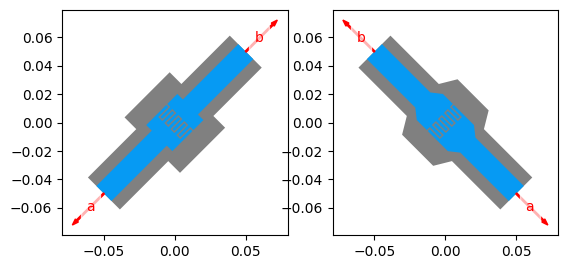

In [2]:
from SQDMetal.Comps.Capacitors import CapacitorInterdigital

design.delete_all_components()
fig, axs = plt.subplots(ncols=2)

##FLAT EDGES##############
CapacitorInterdigital(design, 'leCap', options=dict(pos_x='-50um', pos_y='-50um', end_x='50um' , end_y='50um',
                                                    cpw_width='15um', len_flat='10um', fing_len='10um', fing_len_gap='1um', fing_wid='2um',
                                                    len_diag=0, init_pad='7um', fing_wid_gap='1um', N_total=9, larger_first=True))
##########################

QUtilities.plot_highlight_component('leCap', design, ax=axs[0])
design.delete_all_components()

##DIAGONAL EDGES##########
CapacitorInterdigital(design, 'leCap', options=dict(pos_x='50um', pos_y='-50um', end_x='-50um' , end_y='50um',
                                                    cpw_width='15um', len_flat='10um', fing_len='10um', fing_len_gap='1um', fing_wid='2um',
                                                    len_diag='7um', fing_wid_gap='1um', N_total=9, larger_first=True))
##########################

QUtilities.plot_highlight_component('leCap', design, ax=axs[1])

Using relative coordinates

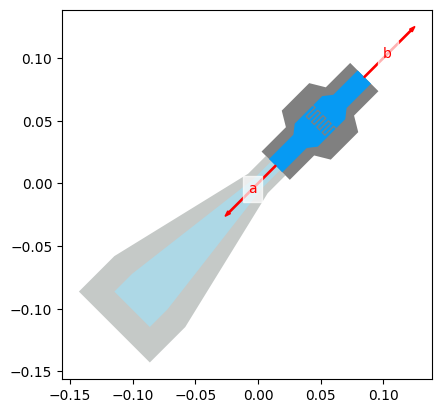

In [3]:
from SQDMetal.Comps.Capacitors import CapacitorInterdigitalPinStretch

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='45', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))

##########################
CapacitorInterdigitalPinStretch(design, 'leCap', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie')), dist_extend='100um',
                                                    cpw_width='15um', len_flat='10um', fing_len='10um', fing_len_gap='1um', fing_wid='2um',
                                                    len_diag='7um', fing_wid_gap='1um', N_total=9, larger_first=True))
##########################

QUtilities.plot_highlight_component('leCap', design)

Using pins (it doesn't draw the leads and requires wiring constructs as shown in the second image)

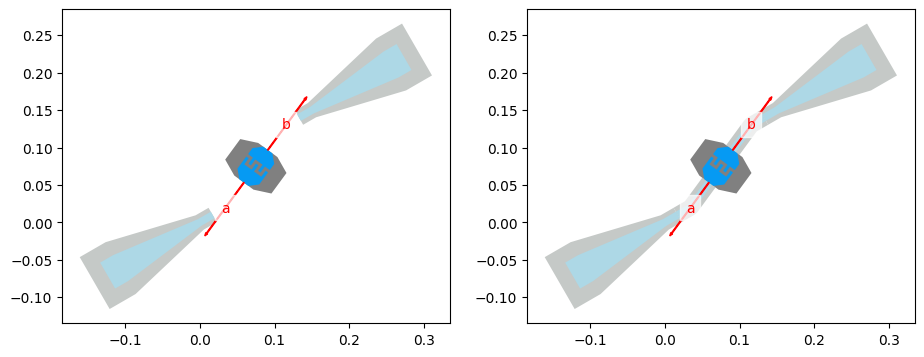

In [4]:
from SQDMetal.Comps.Capacitors import CapacitorInterdigitalPinPin

from SQDMetal.Comps.Wires import WirePins
from SQDMetal.Comps.Joints import JointExtend
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x='150um', pos_y='150um', orientation='-150', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
fig, axs = plt.subplots(ncols=2); fig.set_figwidth(11)
JointExtend(design, 'jnt1', options=Dict(jointObj='LP1', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))
JointExtend(design, 'jnt2', options=Dict(jointObj='LP2', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))

##########################
CapacitorInterdigitalPinPin(design, 'leCap', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'jnt1',pin='a'), end_pin=Dict(component=f'jnt2',pin='a')),
                                                    cpw_width='15um', len_flat='10um', fing_len='10um', fing_len_gap='4um', fing_wid='4um',
                                                    len_diag='10um', fing_wid_gap='4um', N_total=5, larger_first=True))
##########################

QUtilities.plot_highlight_component('leCap', design, ax=axs[0])

WirePins(design, 'lead1', options=Dict(pathObjPins=[('LP1', 'tie'), 'jnt1', ('leCap', 'a')], fillet='10um'))
WirePins(design, 'lead2', options=Dict(pathObjPins=[('LP2', 'tie'), 'jnt2', ('leCap', 'b')], fillet='10um'))

QUtilities.plot_highlight_component('leCap', design, ax=axs[1])

### Gap capacitors  <a class="anchor" id="cap-gap"></a>

Using absolute coordinates

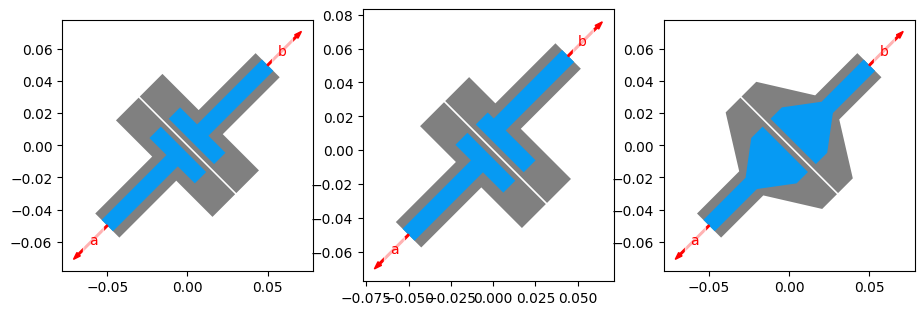

In [5]:
from SQDMetal.Comps.Capacitors import CapacitorGap

design.delete_all_components()
fig, axs = plt.subplots(ncols=3); fig.set_figwidth(11)

##FLAT EDGES##############
CapacitorGap(design, 'leCap', options=dict(pos_x='-50um', pos_y='-50um', end_x='50um' , end_y='50um',
                                           cpw_width='10um', cap_width='40um', len_flat='10um',
                                           len_diag=0, init_pad='7um', cap_gap='7um', gnd_width='1um'))
##########################

QUtilities.plot_highlight_component('leCap', design, ax=axs[0])
design.delete_all_components()

##OFFSET LEADS############
CapacitorGap(design, 'leCap', options=dict(pos_x='-50um', pos_y='-50um', end_x='50um' , end_y='50um',
                                           cpw_width='10um', cap_width='40um', len_flat='10um',
                                           len_diag=0, init_pad='7um', cap_gap='7um', gnd_width='1um',
                                           offset_lead1='2um', offset_lead2='10um'))
##########################

QUtilities.plot_highlight_component('leCap', design, ax=axs[1])
design.delete_all_components()

##DIAGONAL EDGES##########
CapacitorGap(design, 'leCap', options=dict(pos_x='-50um', pos_y='-50um', end_x='50um' , end_y='50um',
                                           cpw_width='10um', cap_width='40um', len_flat='10um',
                                           len_diag='20um', init_pad='7um', cap_gap='7um', gnd_width='1um'))
##########################

QUtilities.plot_highlight_component('leCap', design, ax=axs[2])

Using relative coordinates

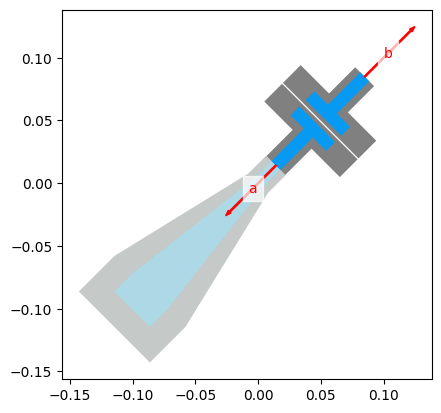

In [6]:
from SQDMetal.Comps.Capacitors import CapacitorGapPinStretch

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='45', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))

##########################
CapacitorGapPinStretch(design, 'leCap', options=dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie')), dist_extend='100um',
                                           cpw_width='10um', cap_width='40um', len_flat='10um',
                                           len_diag=0, init_pad='7um', cap_gap='7um', gnd_width='1um'))
##########################

QUtilities.plot_highlight_component('leCap', design)

Using pins (it doesn't draw the leads and requires wiring constructs as shown in the second image)

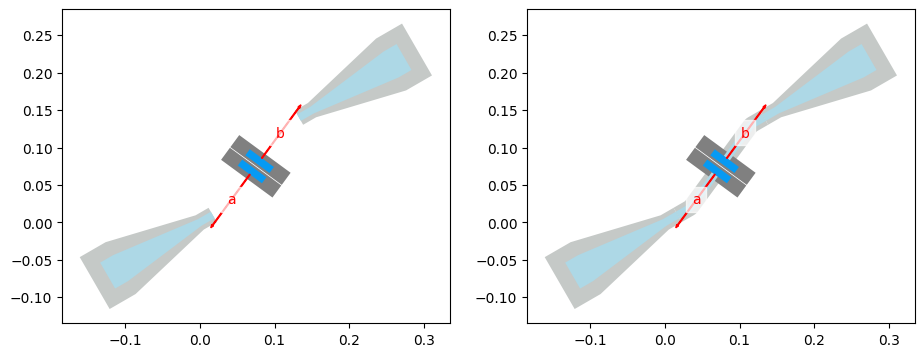

In [7]:
from SQDMetal.Comps.Capacitors import CapacitorGapPinPin

from SQDMetal.Comps.Wires import WirePins
from SQDMetal.Comps.Joints import JointExtend
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x='150um', pos_y='150um', orientation='-150', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
fig, axs = plt.subplots(ncols=2); fig.set_figwidth(11)
JointExtend(design, 'jnt1', options=Dict(jointObj='LP1', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))
JointExtend(design, 'jnt2', options=Dict(jointObj='LP2', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))

##########################
CapacitorGapPinPin(design, 'leCap', options=dict(pin_inputs=Dict(start_pin=Dict(component=f'jnt1',pin='a'), end_pin=Dict(component=f'jnt2',pin='a')),
                                                 cpw_width='10um', cap_width='40um', len_flat='10um',
                                                 len_diag=0, init_pad='7um', cap_gap='7um', gnd_width='1um'))
##########################

QUtilities.plot_highlight_component('leCap', design, ax=axs[0])

WirePins(design, 'lead1', options=Dict(pathObjPins=[('LP1', 'tie'), 'jnt1', ('leCap', 'a')], fillet='10um'))
WirePins(design, 'lead2', options=Dict(pathObjPins=[('LP2', 'tie'), 'jnt2', ('leCap', 'b')], fillet='10um'))

QUtilities.plot_highlight_component('leCap', design, ax=axs[1])

### Gap meander capacitors  <a class="anchor" id="cap-gap-meander"></a>

Using absolute coordinates

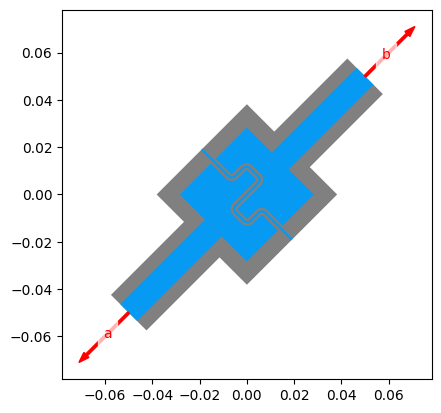

In [8]:
from SQDMetal.Comps.Capacitors import CapacitorGapMeander

design.delete_all_components()

##########################
CapacitorGapMeander(design, 'leCap', options=dict(pos_x='-50um', pos_y='-50um', end_x='50um' , end_y='50um',
                                                  cpw_width='10um', cap_width='40um', cap_length='40um',
                                                  init_pad='7um', side_gap='7um',
                                                  mean_total_length='70um', mean_constr_radius='2um',
                                                  mean_gnd_width='1um', mean_gnd_gap='1um',
                                                  mean_constr_width_max=0, mean_fillet_padding='5um'))
##########################

QUtilities.plot_highlight_component('leCap', design)

Using relative coordinates

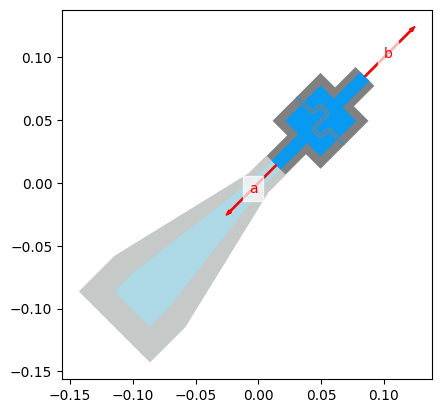

In [9]:
from SQDMetal.Comps.Capacitors import CapacitorGapMeanderPinStretch

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='45', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))

##########################
CapacitorGapMeanderPinStretch(design, 'leCap', options=dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie')), dist_extend='100um',
                                                            cpw_width='10um', cap_width='40um', cap_length='40um',
                                                            init_pad='7um', side_gap='7um',
                                                            mean_total_length='70um', mean_constr_radius='2um',
                                                            mean_gnd_width='1um', mean_gnd_gap='1um',
                                                            mean_constr_width_max=0, mean_fillet_padding='5um'))
##########################

QUtilities.plot_highlight_component('leCap', design)

Using pins (it doesn't draw the leads and requires wiring constructs as shown in the second image)

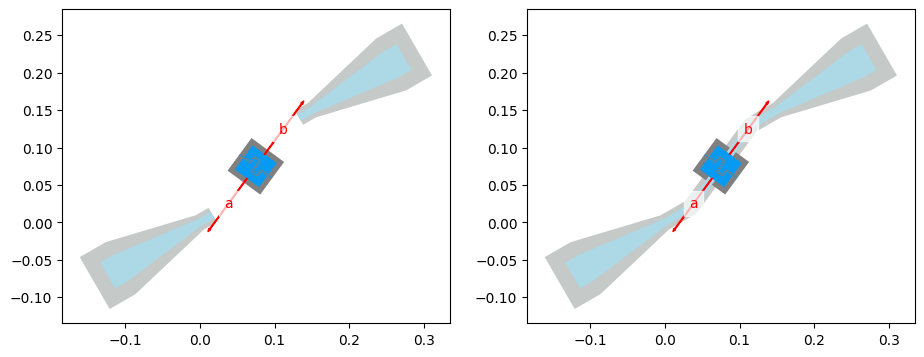

In [10]:
from SQDMetal.Comps.Capacitors import CapacitorGapMeanderPinPin

from SQDMetal.Comps.Wires import WirePins
from SQDMetal.Comps.Joints import JointExtend
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x='150um', pos_y='150um', orientation='-150', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
fig, axs = plt.subplots(ncols=2); fig.set_figwidth(11)
JointExtend(design, 'jnt1', options=Dict(jointObj='LP1', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))
JointExtend(design, 'jnt2', options=Dict(jointObj='LP2', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))

##########################
CapacitorGapMeanderPinPin(design, 'leCap', options=dict(pin_inputs=Dict(start_pin=Dict(component=f'jnt1',pin='a'), end_pin=Dict(component=f'jnt2',pin='a')),
                                                        cpw_width='10um', cap_width='40um', cap_length='40um',
                                                        init_pad='7um', side_gap='7um',
                                                        mean_total_length='70um', mean_constr_radius='2um',
                                                        mean_gnd_width='1um', mean_gnd_gap='1um',
                                                        mean_constr_width_max=0, mean_fillet_padding='5um'))
##########################

QUtilities.plot_highlight_component('leCap', design, ax=axs[0])

WirePins(design, 'lead1', options=Dict(pathObjPins=[('LP1', 'tie'), 'jnt1', ('leCap', 'a')], fillet='10um'))
WirePins(design, 'lead2', options=Dict(pathObjPins=[('LP2', 'tie'), 'jnt2', ('leCap', 'b')], fillet='10um'))

QUtilities.plot_highlight_component('leCap', design, ax=axs[1])

### Prong capacitors on pin <a class="anchor" id="cap-prongs"></a>

Simple prong capacitor

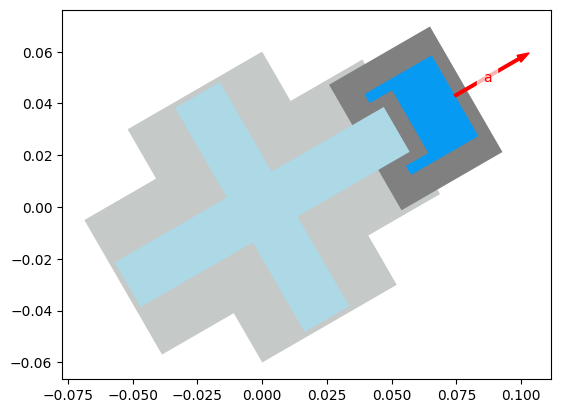

In [11]:
from SQDMetal.Comps.Capacitors import CapacitorProngPin

from SQDMetal.Comps.Xmon import Xmon
design.delete_all_components()
Xmon(design, 'xmon', options=Dict(orientation=30))

##########################
CapacitorProngPin(design, 'leCap', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'xmon',pin='right')),
                                                prong_width='4um', prong_length='10um', pin_gap_side='4um',
                                                gap_side='10um', pad_thickness='20um',
                                                gap_front='10um', gap_back='5um', trace_width='10um'))
##########################

QUtilities.plot_highlight_component('leCap', design)

Prong capacitor with ground-plane going in between:

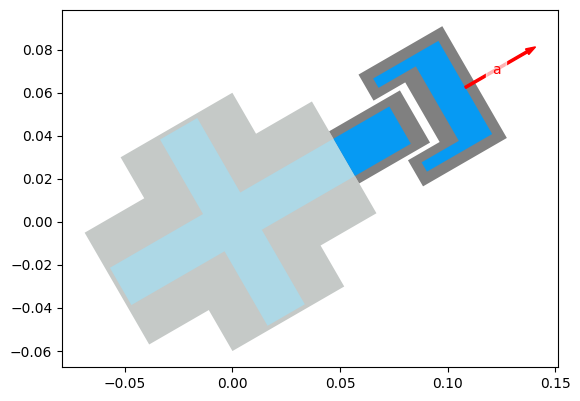

In [12]:
from SQDMetal.Comps.Capacitors import CapacitorUcapGroundPin

from SQDMetal.Comps.Xmon import Xmon
design.delete_all_components()
Xmon(design, 'xmon', options=Dict(orientation=30, gap_right=0))

##########################
CapacitorUcapGroundPin(design, 'leCap', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'xmon',pin='right')),
                                                     prong_trace_gap='10um', pad_trace_gap='20um',
                                                     prong_width='5um', prong_length='20um',
                                                     gnd_prong_trace='2um', gnd_pad_trace='4um',
                                                     pad_thickness='15um'))
##########################

QUtilities.plot_highlight_component('leCap', design)

## Inductors  <a class="anchor" id="ind"></a>

### Meander inductors  <a class="anchor" id="ind-mean"></a>

Using absolute coordinates

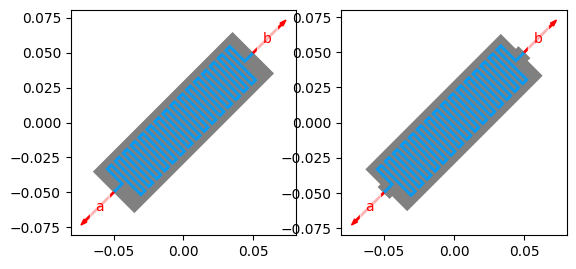

In [13]:
from SQDMetal.Comps.Inductors import InductorMeander

design.delete_all_components()
fig, axs = plt.subplots(ncols=2)

##NO INITIAL GAP##########
InductorMeander(design, 'leInd', options=dict(pos_x='-50um', pos_y='-50um', end_x='50um' , end_y='50um',
                                              track_width='2um', meander_spacing='4um', meander_width='30um', num_long_sections=30,
                                              init_gap=0, mean_gap='5um'))
##########################

QUtilities.plot_highlight_component('leInd', design, ax=axs[0])
design.delete_all_components()

##INITIAL GAP#############
InductorMeander(design, 'leInd', options=dict(pos_x='-50um', pos_y='-50um', end_x='50um' , end_y='50um',
                                              track_width='2um', meander_spacing='4um', meander_width='30um', num_long_sections=30,
                                              init_gap='5um', mean_gap='5um'))
##########################

QUtilities.plot_highlight_component('leInd', design, ax=axs[1])

Using relative coordinates

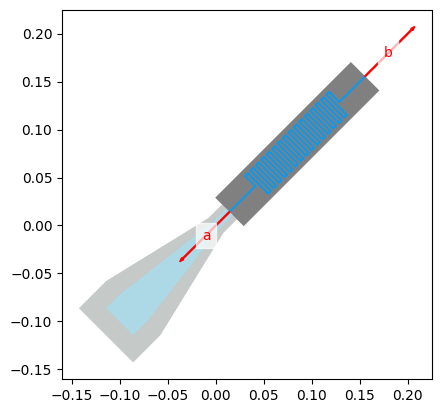

In [14]:
from SQDMetal.Comps.Inductors import InductorMeanderPinStretch

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='45', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))

##########################
InductorMeanderPinStretch(design, 'leInd', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie')), dist_extend='200um',
                                                        track_width='2um', meander_spacing='4um', meander_width='30um', num_long_sections=30,
                                                        init_gap=0, mean_gap='5um'))
##########################

QUtilities.plot_highlight_component('leInd', design)

Using pins

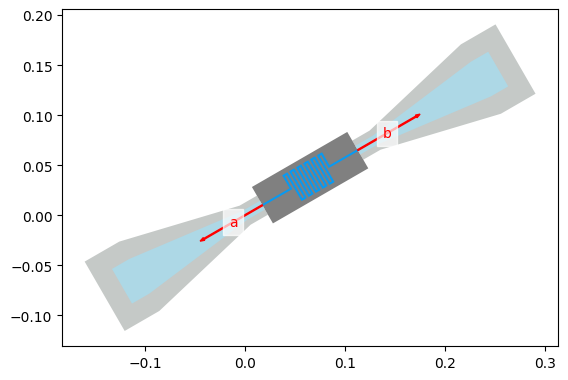

In [15]:
from SQDMetal.Comps.Inductors import InductorMeanderPinPin

from SQDMetal.Comps.Wires import WirePins
from SQDMetal.Comps.Joints import JointExtend
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x=f'{0.866*150}um', pos_y='75um', orientation='-150', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))

##########################
InductorMeanderPinPin(design, 'leInd', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie'), end_pin=Dict(component=f'LP2',pin='tie')),
                                                    track_width='2um', meander_spacing='4um', meander_width='30um', num_long_sections=10,
                                                    init_gap=0, mean_gap='5um'))
##########################

QUtilities.plot_highlight_component('leInd', design)

## Resonators  <a class="anchor" id="res"></a>

### Meander resonators  <a class="anchor" id="res-mean"></a>

Using absolute coordinates

Expected Length: 1mm, Actual Length: 0.9999950580975743mm
Expected Length: 1mm, Actual Length: 0.9999960457910892mm
Expected Length: 1mm, Actual Length: 0.9999918916950894mm


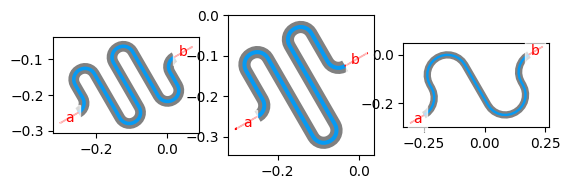

In [16]:
from SQDMetal.Comps.Resonators import ResonatorMeander

design.delete_all_components()
fig, axs = plt.subplots(ncols=3)

#CONSTRAIN RADIUS, WIDTH##
ResonatorMeander(design, 'leRes', options=dict(pos_x='-250um', pos_y='-250um', orientation=30,
                                               total_length='1mm', trace_width='10um', trace_gap='10um', fillet_padding='2um',
                                               constr_radius='30um', constr_width_max='250um', constr_extend_length=0))
##########################

lePts = np.array([x for x in design.qgeometry.get_component('leRes')['path']['geometry'][0].coords])
lePts = QUtilities.calc_filleted_path(lePts, 0.03, design.template_options.PRECISION, 100)
print(f'Expected Length: 1mm, Actual Length: {np.linalg.norm(lePts[1:] - lePts[0:-1], axis=1).sum()}mm')
QUtilities.plot_highlight_component('leRes', design, ax=axs[0], resolution=8)
design.delete_all_components()

#CONSTRAIN RADIUS, LENGTH#
ResonatorMeander(design, 'leRes', options=dict(pos_x='-250um', pos_y='-250um', orientation=30,
                                               total_length='1mm', trace_width='10um', trace_gap='10um', fillet_padding='2um',
                                               constr_radius='30um', constr_width_max=0, constr_extend_length='250um'))
##########################

lePts = np.array([x for x in design.qgeometry.get_component('leRes')['path']['geometry'][0].coords])
lePts = QUtilities.calc_filleted_path(lePts, 0.03, design.template_options.PRECISION, 100)
print(f'Expected Length: 1mm, Actual Length: {np.linalg.norm(lePts[1:] - lePts[0:-1], axis=1).sum()}mm')
QUtilities.plot_highlight_component('leRes', design, ax=axs[1], resolution=8)
design.delete_all_components()

#CONSTRAIN WIDTH, LENGTH###
ResonatorMeander(design, 'leRes', options=dict(pos_x='-250um', pos_y='-250um', orientation=30,
                                               total_length='1mm', trace_width='10um', trace_gap='10um', fillet_padding='2um',
                                               constr_radius=0, constr_width_max='400um', constr_extend_length='500um'))
############################

lePts = np.array([x for x in design.qgeometry.get_component('leRes')['path']['geometry'][0].coords])
fillet_rad = design.qgeometry.get_component('leRes')['path']['fillet'][0]
lePts = QUtilities.calc_filleted_path(lePts, fillet_rad, design.template_options.PRECISION, 100)
print(f'Expected Length: 1mm, Actual Length: {np.linalg.norm(lePts[1:] - lePts[0:-1], axis=1).sum()}mm')
QUtilities.plot_highlight_component('leRes', design, ax=axs[2], resolution=8)

Using relative coordinates

Expected Length: 1mm, Actual Length: 0.9999950575725147mm
Expected Length: 1mm, Actual Length: 0.999996045423972mm
Expected Length: 1mm, Actual Length: 0.9999918934263768mm


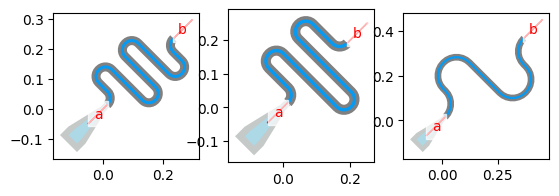

In [17]:
from SQDMetal.Comps.Resonators import ResonatorMeanderPin

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='45', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
fig, axs = plt.subplots(ncols=3)

#CONSTRAIN RADIUS, WIDTH##
ResonatorMeanderPin(design, 'leRes', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie')),
                                                  total_length='1mm', trace_width='10um', trace_gap='10um', fillet_padding='2um',
                                                  constr_radius='30um', constr_width_max='250um', constr_extend_length=0))
##########################

lePts = np.array([x for x in design.qgeometry.get_component('leRes')['path']['geometry'][0].coords])
lePts = QUtilities.calc_filleted_path(lePts, 0.03, design.template_options.PRECISION, 100)
print(f'Expected Length: 1mm, Actual Length: {np.linalg.norm(lePts[1:] - lePts[0:-1], axis=1).sum()}mm')
QUtilities.plot_highlight_component('leRes', design, ax=axs[0], resolution=8)

#CONSTRAIN RADIUS, LENGTH#
ResonatorMeanderPin(design, 'leRes', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie')),
                                                  total_length='1mm', trace_width='10um', trace_gap='10um', fillet_padding='2um',
                                                  constr_radius='30um', constr_width_max=0, constr_extend_length='250um'))
##########################

lePts = np.array([x for x in design.qgeometry.get_component('leRes')['path']['geometry'][0].coords])
lePts = QUtilities.calc_filleted_path(lePts, 0.03, design.template_options.PRECISION, 100)
print(f'Expected Length: 1mm, Actual Length: {np.linalg.norm(lePts[1:] - lePts[0:-1], axis=1).sum()}mm')
QUtilities.plot_highlight_component('leRes', design, ax=axs[1], resolution=8)

#CONSTRAIN WIDTH, LENGTH###
ResonatorMeanderPin(design, 'leRes', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie')),
                                                  total_length='1mm', trace_width='10um', trace_gap='10um', fillet_padding='2um',
                                                  constr_radius=0, constr_width_max='400um', constr_extend_length='500um'))
############################

lePts = np.array([x for x in design.qgeometry.get_component('leRes')['path']['geometry'][0].coords])
fillet_rad = design.qgeometry.get_component('leRes')['path']['fillet'][0]
lePts = QUtilities.calc_filleted_path(lePts, fillet_rad, design.template_options.PRECISION, 100)
print(f'Expected Length: 1mm, Actual Length: {np.linalg.norm(lePts[1:] - lePts[0:-1], axis=1).sum()}mm')
QUtilities.plot_highlight_component('leRes', design, ax=axs[2], resolution=8)

Using pins (can either constrain radius or width)

Expected Length: 1mm, Actual Length: 0.9999930787538981mm
Expected Length: 1mm, Actual Length: 0.9999925525931893mm


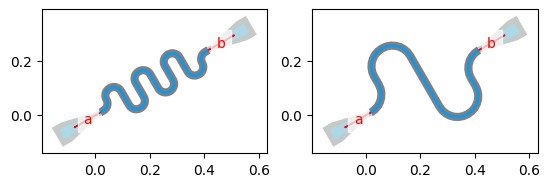

In [18]:
from SQDMetal.Comps.Resonators import ResonatorMeanderPinPin

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x=f'{0.866*500}um', pos_y='250um', orientation='-150', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
fig, axs = plt.subplots(ncols=2)

#CONSTRAIN RADIUS#########
ResonatorMeanderPinPin(design, 'leRes', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie'), end_pin=Dict(component=f'LP2',pin='tie')),
                                                     total_length='1mm', trace_width='10um', trace_gap='10um', fillet_padding='2um',
                                                     constr_radius='30um', constr_width_max=0))
##########################

lePts = np.array([x for x in design.qgeometry.get_component('leRes')['path']['geometry'][0].coords])
lePts = QUtilities.calc_filleted_path(lePts, 0.03, design.template_options.PRECISION, 100)
print(f'Expected Length: 1mm, Actual Length: {np.linalg.norm(lePts[1:] - lePts[0:-1], axis=1).sum()}mm')
QUtilities.plot_highlight_component('leRes', design, ax=axs[0], resolution=8)

#CONSTRAIN WIDTH############
ResonatorMeanderPinPin(design, 'leRes', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie'), end_pin=Dict(component=f'LP2',pin='tie')),
                                                     total_length='1mm', trace_width='10um', trace_gap='10um', fillet_padding='2um',
                                                     constr_radius=0, constr_width_max='400um'))
############################

lePts = np.array([x for x in design.qgeometry.get_component('leRes')['path']['geometry'][0].coords])
fillet_rad = design.qgeometry.get_component('leRes')['path']['fillet'][0]
lePts = QUtilities.calc_filleted_path(lePts, fillet_rad, design.template_options.PRECISION, 100)
print(f'Expected Length: 1mm, Actual Length: {np.linalg.norm(lePts[1:] - lePts[0:-1], axis=1).sum()}mm')
QUtilities.plot_highlight_component('leRes', design, ax=axs[1], resolution=8)

## Markers  <a class="anchor" id="markers"></a>

### Dicing cross <a class="anchor" id="markers-dice-cross"></a>

Simple cross

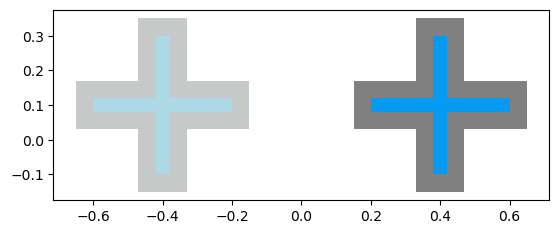

In [15]:
from SQDMetal.Comps.Markers import MarkerDicingCross

design.delete_all_components()
############################
MarkerDicingCross(design, 'mkr', options=Dict(pos_x='400um', pos_y='100um',
                                              cross_size='400um', bar_width='40um', cross_gap='50um'))
############################

MarkerDicingCross(design, 'mkr2', options=Dict(pos_x='-400um', pos_y='100um',
                                              cross_size='400um', bar_width='40um', cross_gap='50um'))

QUtilities.plot_highlight_component('mkr', design)

### Square marker <a class="anchor" id="markers-square"></a>

Simple square

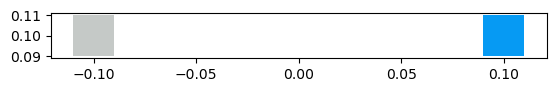

In [13]:
from SQDMetal.Comps.Markers import MarkerSquare

design.delete_all_components()
############################
MarkerSquare(design, 'mkr', options=Dict(pos_x='100um', pos_y='100um',
                                         square_width='20um', square_height='20um'))
############################

MarkerSquare(design, 'mkr2', options=Dict(pos_x='-100um', pos_y='100um',
                                          square_width='20um', square_height='20um',
                                          is_ground_cutout=True))

QUtilities.plot_highlight_component('mkr', design)

### Quadruple square marker <a class="anchor" id="markers-square4"></a>

A quadruple square

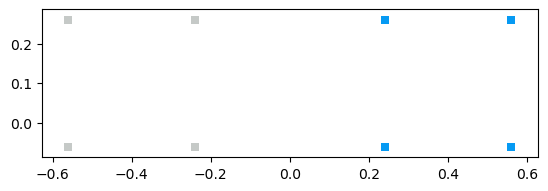

In [14]:
from SQDMetal.Comps.Markers import MarkerSquare4

design.delete_all_components()
############################
MarkerSquare4(design, 'mkr', options=Dict(pos_x='400um', pos_y='100um',
                                          square_spacing_x='320um', square_spacing_y='320um',
                                          square_width='20um', square_height='20um'))
############################

MarkerSquare4(design, 'mkr2', options=Dict(pos_x='-400um', pos_y='100um',
                                          square_spacing_x='320um', square_spacing_y='320um',
                                          square_width='20um', square_height='20um',
                                          is_ground_cutout=True))

QUtilities.plot_highlight_component('mkr', design)

## Bandages  <a class="anchor" id="bandages"></a>

### Rectangular patches <a class="anchor" id="bandages-rectangle"></a>

Basic rectangular patch on a pin

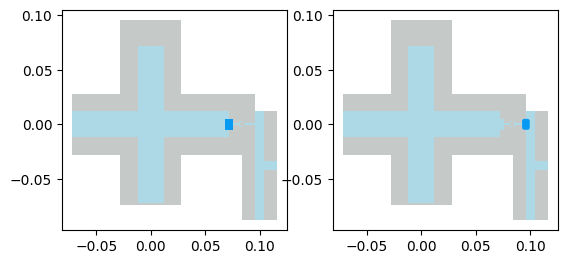

In [5]:
from SQDMetal.Comps.Bandages import BandageRectPin

from SQDMetal.Comps.Junctions import JunctionDolanPinStretch
from SQDMetal.Comps.Xmon import Xmon
from SQDMetal.Comps.FluxLines import FluxLineTPin
design.delete_all_components()
Xmon(design, 'leXmon', options=Dict(pos_x=0, pos_y=0,
                                    vBar_width='24um', hBar_width='24um', vBar_gap='16um', hBar_gap='16um',
                                    cross_width='144um', cross_height='144um',
                                    gap_up='24um', gap_left='0um', gap_right='24um'))
FluxLineTPin(design, 'flux_line_T', options=Dict(ref_comp='leXmon', ref_pin='right',
                                                 width=f'100um',
                                                 trace_width=f'8um',
                                                 trace_gap=f'12um',pin_dist='24um'))
JunctionDolanPinStretch(design, 'junction', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'flux_line_T',pin='t')),
                                                         dist_extend='25um',
                                                         finger_width='0.4um', t_pad_size='0.385um',
                                                         squid_width='5.4um', prong_width='0.9um'))
fig, axs = plt.subplots(ncols=2)

############################
BandageRectPin(design, 'bandaid', options=Dict(target_comp='leXmon',target_pin='right',
                                               width='7um', height='10um'))
############################

QUtilities.plot_highlight_component('bandaid', design, ax=axs[0])

#CURVE IT ON EDGES##########
BandageRectPin(design, 'bandaid2', options=Dict(target_comp='flux_line_T',target_pin='t',
                                                fillet_radius='2um', width='7um', height='10um'))
############################


QUtilities.plot_highlight_component('bandaid2', design, ax=axs[1])

### Tapered patches <a class="anchor" id="bandages-tapered"></a>

Basic tapered patch on a pin (note it's in the centre)

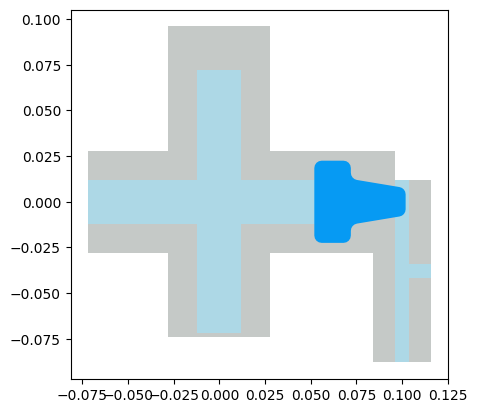

In [2]:
from SQDMetal.Comps.Bandages import BandageTaperedPin

from SQDMetal.Comps.Junctions import JunctionDolanPinStretch
from SQDMetal.Comps.Xmon import Xmon
from SQDMetal.Comps.FluxLines import FluxLineTPin
design.delete_all_components()
Xmon(design, 'leXmon', options=Dict(pos_x=0, pos_y=0,
                                    vBar_width='24um', hBar_width='24um', vBar_gap='16um', hBar_gap='16um',
                                    cross_width='144um', cross_height='144um',
                                    gap_up='24um', gap_left='0um', gap_right='24um'))
FluxLineTPin(design, 'flux_line_T', options=Dict(ref_comp='leXmon', ref_pin='right',
                                                 width=f'100um',
                                                 trace_width=f'8um',
                                                 trace_gap=f'12um',pin_dist='24um'))
JunctionDolanPinStretch(design, 'junction', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'flux_line_T',pin='t')),
                                                         dist_extend='25um',
                                                         finger_width='0.4um', t_pad_size='0.385um',
                                                         squid_width='5.4um', prong_width='0.9um'))

############################
BandageTaperedPin(design, 'bandaid', options=Dict(target_comp='leXmon',target_pin='right',
                                               taper_width_top='15um',
                                               taper_width_base='25um',
                                               base_width='45um',
                                               fillet_radius='4um',
                                               orientation=0,
                                               ignore_slope_check=True))
############################

QUtilities.plot_highlight_component('bandaid', design)

## Text Labels <a class="anchor" id="text-labels"></a>

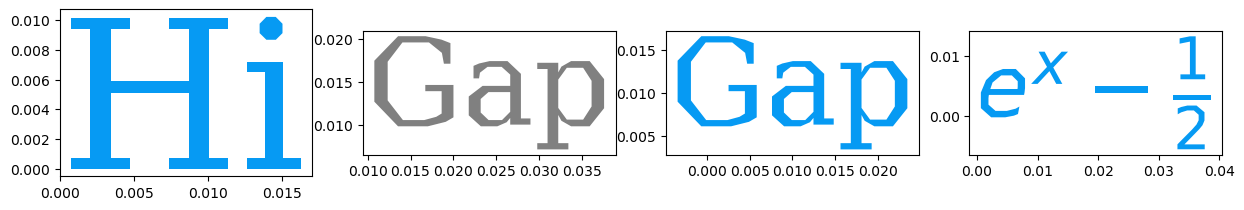

In [12]:
from SQDMetal.Comps.Labels import LabelText

design.delete_all_components()
############################
LabelText(design, 'leText', options=Dict(pos_x=0, pos_y=0,
                                    text='Hi', font_size='10um', font='serif'))
############################

fig, axs = plt.subplots(ncols=4); fig.set_figwidth(15)
QUtilities.plot_highlight_component('leText', design, ax=axs[0])
design.delete_all_components()

#CUT INTO GROUND PLANE######
LabelText(design, 'leText', options=Dict(pos_x='10um', pos_y='10um',
                                    text="Gap", font_size='10um', font='serif', is_gap=True))
############################

QUtilities.plot_highlight_component('leText', design, ax=axs[1])
design.delete_all_components()

#CENTRE TEXT ON POSITION####
LabelText(design, 'leText', options=Dict(pos_x='10um', pos_y='10um',
                                    text="Gap", font_size='10um', font='serif', centre_text=True))
############################

QUtilities.plot_highlight_component('leText', design, ax=axs[2])
design.delete_all_components()

#TYPESET LATEX##############
LabelText(design, 'leText', options=Dict(pos_x=0, pos_y=0,
                                    text=r"$e^x-\frac{1}{2}$", font_size='10um', is_latex=True))
############################

QUtilities.plot_highlight_component('leText', design, ax=axs[3])

## Joints  <a class="anchor" id="joints"></a>

### Basic isolated pin <a class="anchor" id="joints-joint"></a>

Basic joint

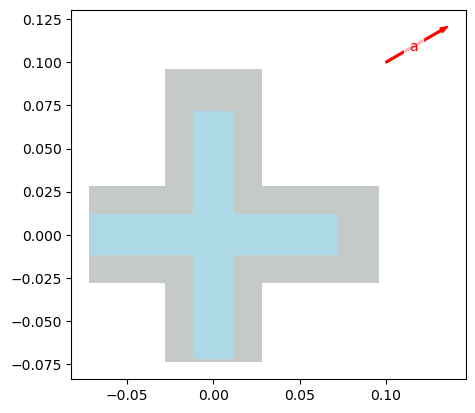

In [63]:
from SQDMetal.Comps.Joints import Joint

from SQDMetal.Comps.Xmon import Xmon
design.delete_all_components()
Xmon(design, 'leXmon', options=Dict(pos_x=0, pos_y=0,
                                    vBar_width='24um', hBar_width='24um', vBar_gap='16um', hBar_gap='16um',
                                    cross_width='144um', cross_height='144um',
                                    gap_up='24um', gap_left='0um', gap_right='24um'))

############################
Joint(design, 'leJoint', options=Dict(pos_x='100um', pos_y='100um', orientation=30))
############################

QUtilities.plot_highlight_component('leJoint', design)

### Extending pin off another pin <a class="anchor" id="joints-jointextend"></a>

Extending joint off another pin (can manually specify direction vector or use the source pin's direction)

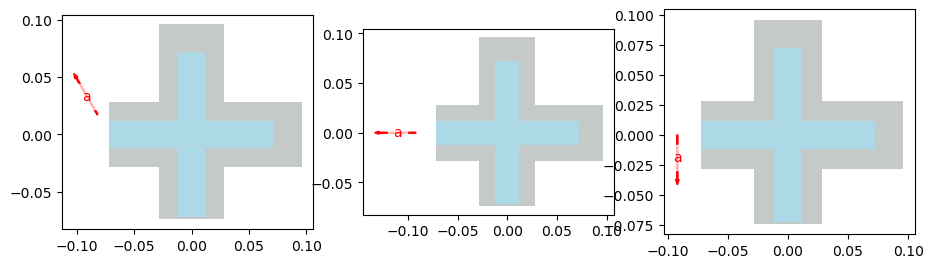

In [70]:
from SQDMetal.Comps.Joints import Joint

from SQDMetal.Comps.Xmon import Xmon
design.delete_all_components()
Xmon(design, 'leXmon', options=Dict(pos_x=0, pos_y=0,
                                    vBar_width='24um', hBar_width='24um', vBar_gap='16um', hBar_gap='16um',
                                    cross_width='144um', cross_height='144um',
                                    gap_up='24um', gap_left='0um', gap_right='24um'))
fig, axs = plt.subplots(ncols=3); fig.set_figwidth(11)

#MANUAL DIRECTION FROM PIN##
JointExtend(design, 'leJoint', options=Dict(jointObj='leXmon', jointPin='left',
                                            dist_extend='20um', orientation=120,
                                            pin_width='10um', extend_off_pin_dir=False))
############################

QUtilities.plot_highlight_component('leJoint', design, ax=axs[0])

#USE PIN'S DIRECTION########
JointExtend(design, 'leJoint', options=Dict(jointObj='leXmon', jointPin='left',
                                            dist_extend='20um', orientation=150,
                                            pin_width='10um', extend_off_pin_dir=True))
############################

QUtilities.plot_highlight_component('leJoint', design, ax=axs[1])

#SPECIFY NEW PIN DIRECTION##
JointExtend(design, 'leJoint', options=Dict(jointObj='leXmon', jointPin='left',
                                            dist_extend='20um', orientation=150,
                                            pin_width='10um', extend_off_pin_dir=True,
                                            pin_orientation=270))
############################

QUtilities.plot_highlight_component('leJoint', design, ax=axs[2])

### Pin on side of wire/routing object <a class="anchor" id="joints-route"></a>

A pin to the side of a wire when given as a fraction of wire's distance

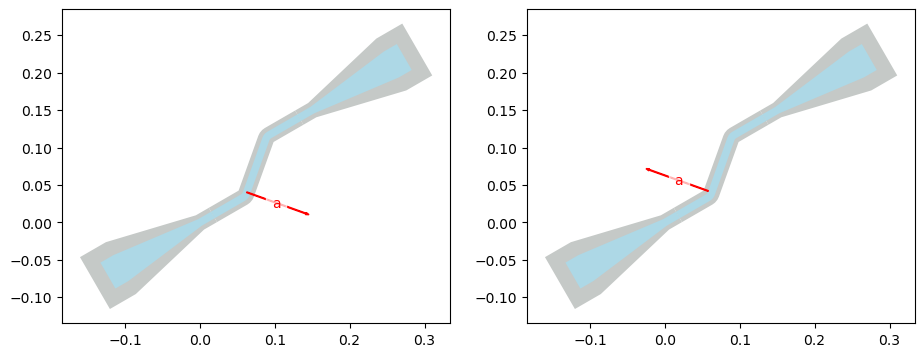

In [79]:
from SQDMetal.Comps.Joints import RouteJoint

from SQDMetal.Comps.Capacitors import CapacitorInterdigitalPinPin
from SQDMetal.Comps.Wires import WirePins
from SQDMetal.Comps.Joints import JointExtend
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x='150um', pos_y='150um', orientation='-150', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
JointExtend(design, 'jnt1', options=Dict(jointObj='LP1', jointPin='tie', dist_extend='50um', extend_off_pin_dir=True))
JointExtend(design, 'jnt2', options=Dict(jointObj='LP2', jointPin='tie', dist_extend='50um', extend_off_pin_dir=True))
WirePins(design, 'lead', options=Dict(pathObjPins=[('LP1', 'tie'), 'jnt1', 'jnt2', ('LP2', 'tie')], fillet='10um'))
fig, axs = plt.subplots(ncols=2); fig.set_figwidth(11)

#BASIC POSITIONING (RHS)####
RouteJoint(design, 'jntRoute', options=Dict(pathObj='lead', frac_line=0.3, is_right_hand=True))
############################

QUtilities.plot_highlight_component('jntRoute', design, ax=axs[0])

#PIN ON WIRE-EDGE (LHS)#####
RouteJoint(design, 'jntRoute', options=Dict(pathObj='lead', frac_line=0.3, is_right_hand=False, attach_on_side=True))
############################

QUtilities.plot_highlight_component('jntRoute', design, ax=axs[1])

A pin to the side of a wire when given as an absolute distance along wire

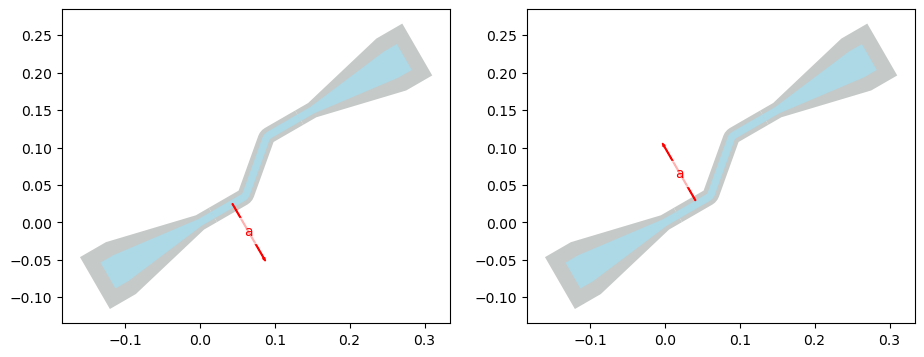

In [99]:
from SQDMetal.Comps.Joints import RouteJoint

from SQDMetal.Comps.Wires import WirePins
from SQDMetal.Comps.Joints import JointExtend
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x='150um', pos_y='150um', orientation='-150', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
JointExtend(design, 'jnt1', options=Dict(jointObj='LP1', jointPin='tie', dist_extend='50um', extend_off_pin_dir=True))
JointExtend(design, 'jnt2', options=Dict(jointObj='LP2', jointPin='tie', dist_extend='50um', extend_off_pin_dir=True))
WirePins(design, 'lead', options=Dict(pathObjPins=[('LP1', 'tie'), 'jnt1', 'jnt2', ('LP2', 'tie')], fillet='10um'))
fig, axs = plt.subplots(ncols=2); fig.set_figwidth(11)

#BASIC POSITIONING (RHS)####
RouteJoint(design, 'jntRoute', options=Dict(pathObj='lead', dist_line='30um', frac_line=-1, is_right_hand=True))
############################

QUtilities.plot_highlight_component('jntRoute', design, ax=axs[0])

#PIN ON WIRE-EDGE (LHS)#####
RouteJoint(design, 'jntRoute', options=Dict(pathObj='lead', dist_line='30um', frac_line=-1, is_right_hand=False, attach_on_side=True))
############################

QUtilities.plot_highlight_component('jntRoute', design, ax=axs[1])

## Wires  <a class="anchor" id="wires"></a>

### Wire extending off a pin <a class="anchor" id="wire-pinstretch"></a>

Basic wire stretching off a pin

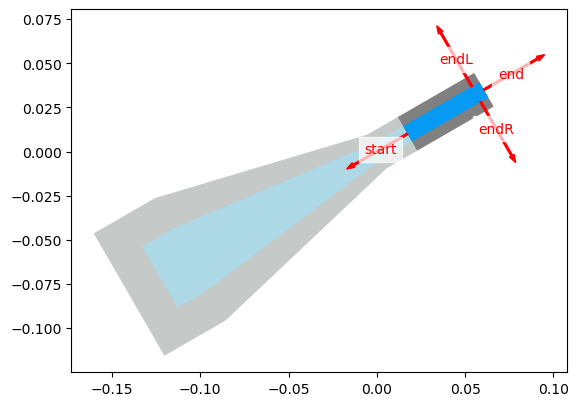

In [81]:
from SQDMetal.Comps.Wires import WirePinStretch

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))

#BASIC POSITIONING (RHS)####
WirePinStretch(design, 'leWire', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie')),
                                              dist_extend='50um'))
############################

QUtilities.plot_highlight_component('leWire', design)

Gaps can be added to the start and end for grounding-cutting purposes

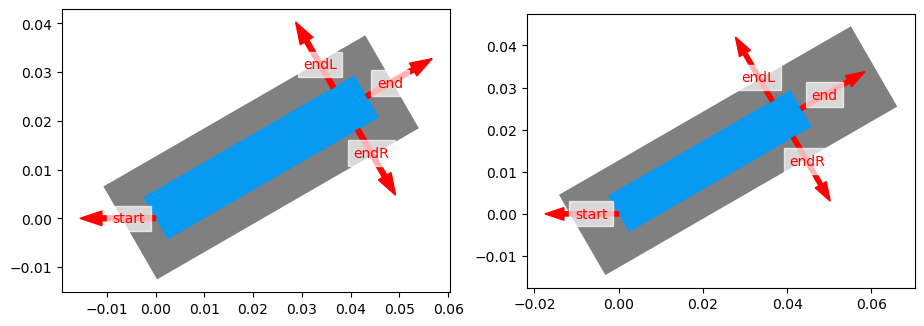

In [86]:
from SQDMetal.Comps.Wires import WirePinStretch

from SQDMetal.Comps.Joints import Joint
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
Joint(design, 'jnt', options = dict(pos_x=0, pos_y=0, orientation=30))
fig, axs = plt.subplots(ncols=2); fig.set_figwidth(11)

#GAP GIVEN BY TRACE GAP#####
WirePinStretch(design, 'leWire', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'jnt',pin='a')),
                                              dist_extend='50um', start_gap=0, end_gap=0))
############################

QUtilities.plot_highlight_component('leWire', design, ax=axs[0])

#MANUALLY SPECIFY GAP#######
WirePinStretch(design, 'leWire', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'jnt',pin='a')),
                                              dist_extend='50um', start_gap='10um', end_gap='20um'))
############################

QUtilities.plot_highlight_component('leWire', design, ax=axs[1])

### Manual wire routing through pins <a class="anchor" id="wire-wirepins"></a>

When facing each other in anti-parallel manner

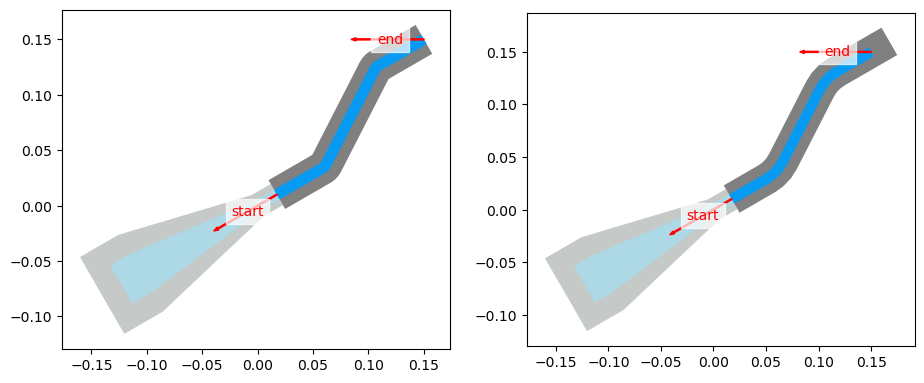

In [101]:
from SQDMetal.Comps.Wires import WirePins

from SQDMetal.Comps.Joints import Joint, JointExtend
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
Joint(design, 'LP2', options = dict(pos_x='150um', pos_y='150um', orientation='30'))
JointExtend(design, 'jnt1', options=Dict(jointObj='LP1', jointPin='tie', dist_extend='50um', extend_off_pin_dir=True))
JointExtend(design, 'jnt2', options=Dict(jointObj='LP2', jointPin='a', dist_extend='-50um', extend_off_pin_dir=True))
fig, axs = plt.subplots(ncols=2); fig.set_figwidth(11)

#BASIC WIRING###############
WirePins(design, 'lead', options=Dict(pathObjPins=[('LP1', 'tie'), 'jnt1', 'jnt2', 'LP2'],
                                      trace_width='10um', trace_gap='10um', fillet='10um'))
############################

QUtilities.plot_highlight_component('lead', design, ax=axs[0])

#GROUND CUT ON END##########
WirePins(design, 'lead', options=Dict(pathObjPins=[('LP1', 'tie'), 'jnt1', 'jnt2', 'LP2'],
                                      trace_width='10um', trace_gap='10um', fillet='40um', end_gap='20um'))
############################

QUtilities.plot_highlight_component('lead', design, ax=axs[1])

### Parallel connecting S-elbow wire <a class="anchor" id="wire-S"></a>

Antiparallel connecting elbow wire

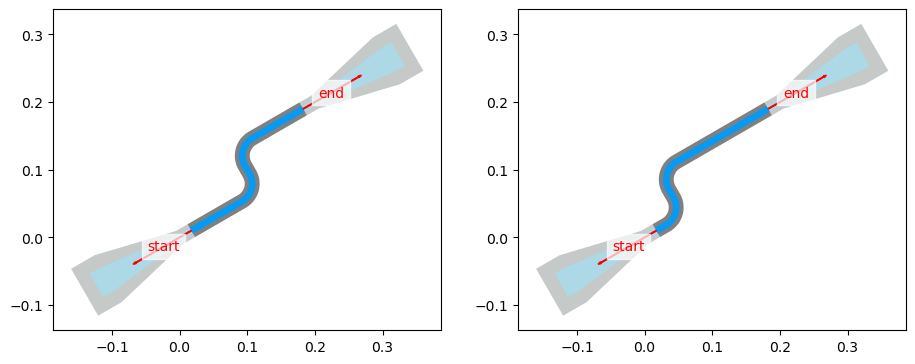

In [106]:
from SQDMetal.Comps.Wires import WireElbowParallelPinPin

from SQDMetal.Comps.Joints import JointExtend
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x='200um', pos_y='200um', orientation='-150', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
fig, axs = plt.subplots(ncols=2); fig.set_figwidth(11)

#NORMAL S-BEND##############
WireElbowParallelPinPin(design, 'wireS', options=Dict(pin_inputs=Dict(start_pin=Dict(component='LP1',pin='tie'), end_pin=Dict(component='LP2',pin='tie')),
                                                      fillet='30um'))
############################

QUtilities.plot_highlight_component('wireS', design, ax=axs[0], resolution=32)

#FRACTIONAL POSITION OF S###
WireElbowParallelPinPin(design, 'wireS', options=Dict(pin_inputs=Dict(start_pin=Dict(component='LP1',pin='tie'), end_pin=Dict(component='LP2',pin='tie')),
                                                      fillet='30um', frac_pos_elbow=0.2))
############################

QUtilities.plot_highlight_component('wireS', design, ax=axs[1], resolution=32)

Antiparallel connecting elbow

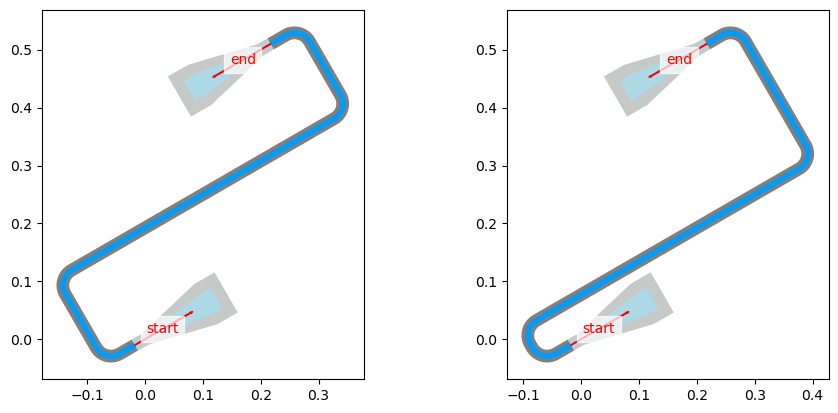

In [109]:
from SQDMetal.Comps.Wires import WireElbowParallelPinPin

from SQDMetal.Comps.Joints import JointExtend
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='-150', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x='200um', pos_y='500um', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
fig, axs = plt.subplots(ncols=2); fig.set_figwidth(11)

#NORMAL S-BEND##############
WireElbowParallelPinPin(design, 'wireS', options=Dict(pin_inputs=Dict(start_pin=Dict(component='LP1',pin='tie'), end_pin=Dict(component='LP2',pin='tie')),
                                                      fillet='30um', pin_pad='30um'))
############################

QUtilities.plot_highlight_component('wireS', design, ax=axs[0], resolution=32)

#FRACTIONAL POSITION OF S###
WireElbowParallelPinPin(design, 'wireS', options=Dict(pin_inputs=Dict(start_pin=Dict(component='LP1',pin='tie'), end_pin=Dict(component='LP2',pin='tie')),
                                                      fillet='30um', pin_pad='30um', frac_pos_elbow=0.2))
############################

QUtilities.plot_highlight_component('wireS', design, ax=axs[1], resolution=32)

Parallel connecting elbow

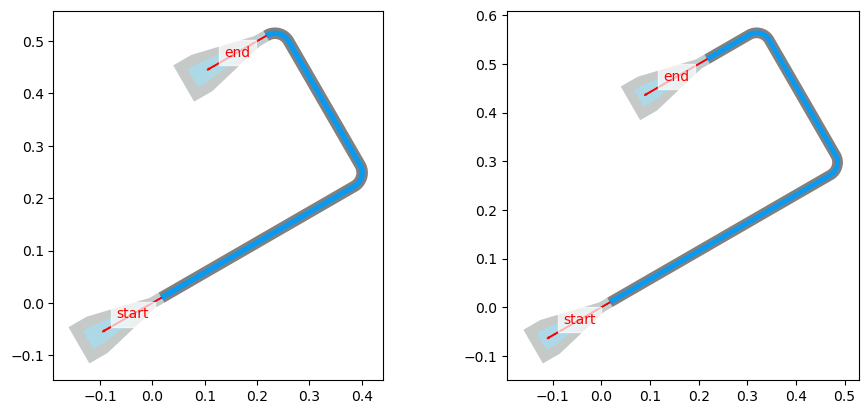

In [111]:
from SQDMetal.Comps.Wires import WireElbowParallelPinPin

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x='200um', pos_y='500um', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
fig, axs = plt.subplots(ncols=2); fig.set_figwidth(11)

#NORMAL S-BEND##############
WireElbowParallelPinPin(design, 'wireS', options=Dict(pin_inputs=Dict(start_pin=Dict(component='LP1',pin='tie'), end_pin=Dict(component='LP2',pin='tie')),
                                                      fillet='30um'))
############################

QUtilities.plot_highlight_component('wireS', design, ax=axs[0], resolution=32)

#MODIFY WIRE PADDING########
WireElbowParallelPinPin(design, 'wireS', options=Dict(pin_inputs=Dict(start_pin=Dict(component='LP1',pin='tie'), end_pin=Dict(component='LP2',pin='tie')),
                                                      fillet='30um', pin_pad='100um'))
############################

QUtilities.plot_highlight_component('wireS', design, ax=axs[1], resolution=32)

### Single elbow connector <a class="anchor" id="wire-elbow"></a>

Basic connecting elbow wire

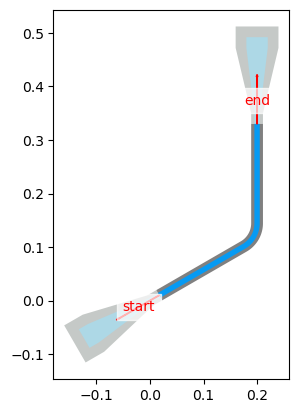

In [120]:
from SQDMetal.Comps.Wires import WireElbowSingle

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x='200um', pos_y='350um', orientation='-90', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))

#NORMAL S-BEND##############
WireElbowSingle(design, 'wireS', options=Dict(pin_inputs=Dict(start_pin=Dict(component='LP1',pin='tie'), end_pin=Dict(component='LP2',pin='tie')),
                                              fillet='50um'))
############################

QUtilities.plot_highlight_component('wireS', design, resolution=32)

### Wire taper (to change wire size) <a class="anchor" id="wire-taper"></a>

Basic taper

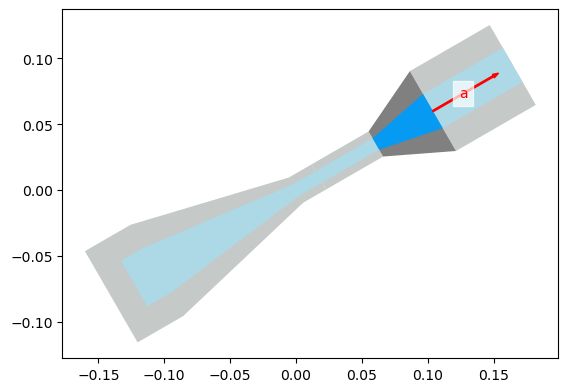

In [133]:
from SQDMetal.Comps.Wires import WireTaperPinStretch

from SQDMetal.Comps.Wires import WirePinStretch
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
WirePinStretch(design, 'leWire', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie')),
                                              dist_extend='50um'))

#BASIC POSITIONING (RHS)####
WireTaperPinStretch(design, 'taper', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'leWire',pin='end')),
                                                  dist_extend='50um', trace_width='30um', trace_gap='20um'))
############################

WirePinStretch(design, 'leWire2', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'taper',pin='a')),
                                               dist_extend='70um', trace_width='30um', trace_gap='20um'))

QUtilities.plot_highlight_component('taper', design)

### Wire dual-probe taper <a class="anchor" id="wire-dual-probe-taper"></a>

Dual probe pins

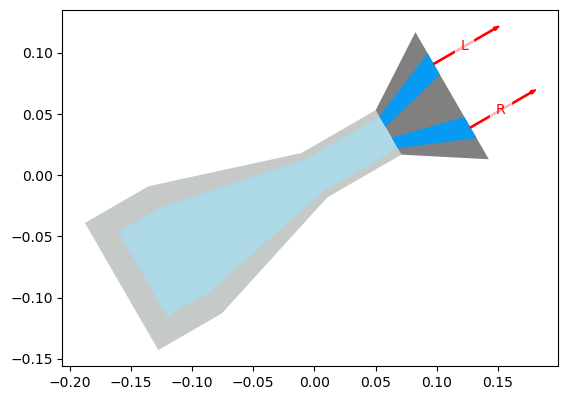

In [150]:
from SQDMetal.Comps.Wires import WireTaperProbePinStretch

from SQDMetal.Comps.Wires import WirePinStretch
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='40um', 
                      pad_width='80um', pad_gap='20um', trace_width='30um'))
WirePinStretch(design, 'leWire', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'LP1',pin='tie')),
                                              dist_extend='50um', trace_width='30um'))

#BASIC POSITIONING (RHS)####
WireTaperProbePinStretch(design, 'probe', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'leWire',pin='end')),
                                                        dist_extend='60um', probe_gap1='10um', probe_gap2='40um',
                                                        trace_width='20um', trace_gap='20um'))
############################

QUtilities.plot_highlight_component('probe', design)

## Xmon  <a class="anchor" id="xmon"></a>

### Basic Xmon <a class="anchor" id="xmon-basic"></a>

Basic Xmon

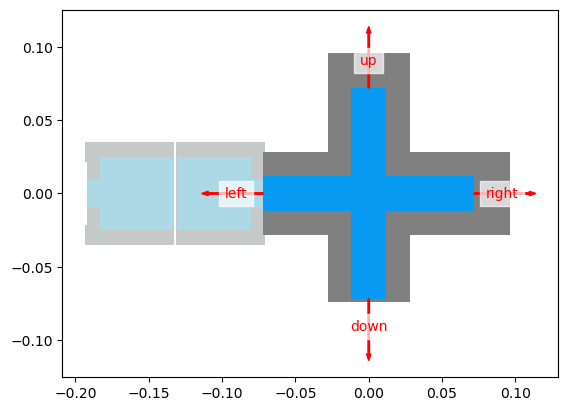

In [119]:
from SQDMetal.Comps.Xmon import Xmon

from SQDMetal.Comps.Capacitors import CapacitorGapPinStretch
design.delete_all_components()
############################
Xmon(design, 'leXmon', options=Dict(pos_x=0, pos_y=0,
                                    vBar_width='24um', hBar_width='24um', vBar_gap='16um', hBar_gap='16um',
                                    cross_width='144um', cross_height='144um',
                                    gap_up='24um', gap_left='0um', gap_right='24um'))

############################

CapacitorGapPinStretch(design, f'capProng', options=Dict(cpw_width=f'20um',
                                            pin_inputs=Dict(start_pin=Dict(component=f'leXmon',pin='left')),
                                            dist_extend='120um',
                                            cap_width=f'50um',
                                            cap_gap='3um',
                                            gnd_width='1um',
                                            len_diag='0um', len_flat=f'50um',
                                            side_gap=f'10um', init_pad='10um'
                                            ))

QUtilities.plot_highlight_component('leXmon', design)

## Flux lines  <a class="anchor" id="flux-lines"></a>

### T-junction flux line <a class="anchor" id="flux-lines-T"></a>

A T-junction flux line to equally balance the currents to ground on the CPW

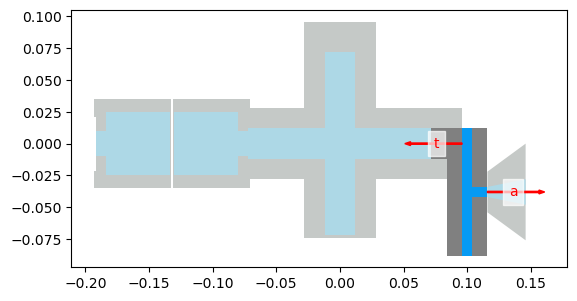

In [28]:
from SQDMetal.Comps.FluxLines import FluxLineTPin

from SQDMetal.Comps.Xmon import Xmon
from SQDMetal.Comps.Capacitors import CapacitorGapPinStretch
from SQDMetal.Comps.Wires import WireTaperPinStretch
design.delete_all_components()
Xmon(design, 'leXmon', options=Dict(pos_x=0, pos_y=0,
                                    vBar_width='24um', hBar_width='24um', vBar_gap='16um', hBar_gap='16um',
                                    cross_width='144um', cross_height='144um',
                                    gap_up='24um', gap_left='0um', gap_right='24um'))

############################
FluxLineTPin(design, 'flux_line_T', options=Dict(ref_comp='leXmon', ref_pin='right',
                                                 width=f'100um',
                                                 trace_width=f'8um',
                                                 trace_gap=f'12um',pin_dist='24um'))
############################
WireTaperPinStretch(design, 'flux_ln_taper', options=Dict(pin_inputs={'start_pin': {'component': 'flux_line_T', 'pin': 'a'}},
                                                   trace_width=f'20um', trace_gap=f'28um', taper_length='50um'))

CapacitorGapPinStretch(design, f'capProng', options=Dict(cpw_width=f'20um',
                                            pin_inputs=Dict(start_pin=Dict(component=f'leXmon',pin='left')),
                                            dist_extend='120um',
                                            cap_width=f'50um',
                                            cap_gap='3um',
                                            gnd_width='1um',
                                            len_diag='0um', len_flat=f'50um',
                                            side_gap=f'10um', init_pad='10um'
                                            ))

QUtilities.plot_highlight_component('flux_line_T', design)

## Josephson junctions  <a class="anchor" id="jjunctions"></a>

### Dolan bridge <a class="anchor" id="jjunctions-dolan"></a>

Using absolute coordinates

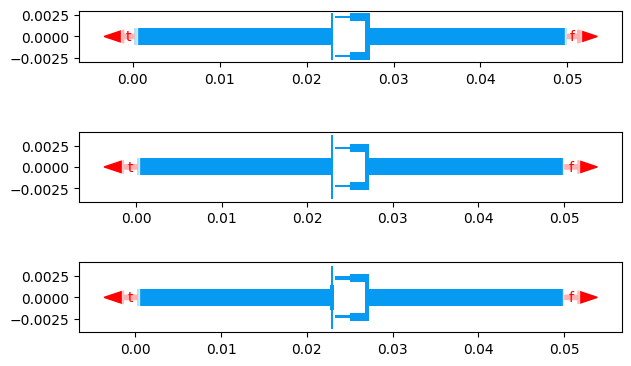

In [21]:
from SQDMetal.Comps.Junctions import JunctionDolan

fig, axs = plt.subplots(nrows=3); fig.set_figwidth(7)
design.delete_all_components()
############################
JunctionDolan(design, 'junction', options=Dict(pos_x=0, pos_y=0,
                                               squid_width='5.4um', prong_width='0.9um'))
############################

QUtilities.plot_highlight_component('junction', design, arrow_width=0.0005, ax=axs[0])
design.delete_all_components()

#ADD EXTRA BUFFER FINGERS###
JunctionDolan(design, 'junction', options=Dict(pos_x=0, pos_y=0,
                                               t_pad_extra='1um',
                                               squid_width='5.4um', prong_width='0.9um'))
############################

QUtilities.plot_highlight_component('junction', design, arrow_width=0.0005, ax=axs[1])
design.delete_all_components()

#ADJUST SIDE FINGER WIDTH###
JunctionDolan(design, 'junction', options=Dict(pos_x=0, pos_y=0,
                                               finger_width='0.4um',
                                               t_pad_width='0.5um', t_pad_length='3um', t_finger_width='0.2um',
                                               t_pad_extra='1um',
                                               squid_width='5.4um', prong_width='0.9um'))
############################

QUtilities.plot_highlight_component('junction', design, arrow_width=0.0005, ax=axs[2])

Using relative coordinates

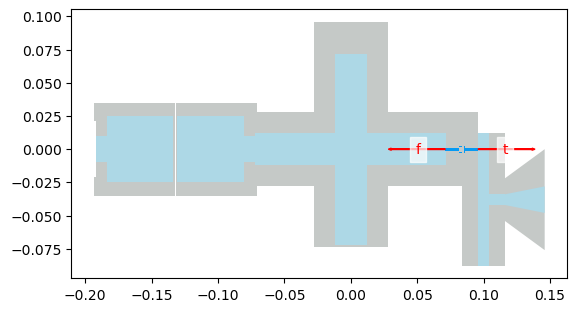

In [ ]:
from SQDMetal.Comps.Junctions import JunctionDolanPinStretch

design.delete_all_components()
from SQDMetal.Comps.Xmon import Xmon
from SQDMetal.Comps.Capacitors import CapacitorGapPinStretch
from SQDMetal.Comps.Wires import WireTaperPinStretch
from SQDMetal.Comps.FluxLines import FluxLineTPin
design.delete_all_components()
Xmon(design, 'leXmon', options=Dict(pos_x=0, pos_y=0,
                                    vBar_width='24um', hBar_width='24um', vBar_gap='16um', hBar_gap='16um',
                                    cross_width='144um', cross_height='144um',
                                    gap_up='24um', gap_left='0um', gap_right='24um'))

FluxLineTPin(design, 'flux_line_T', options=Dict(ref_comp='leXmon', ref_pin='right',
                                                 width=f'100um',
                                                 trace_width=f'8um',
                                                 trace_gap=f'12um',pin_dist='24um'))
WireTaperPinStretch(design, 'flux_ln_taper', options=Dict(pin_inputs={'start_pin': {'component': 'flux_line_T', 'pin': 'a'}},
                                                   trace_width=f'20um', trace_gap=f'28um', taper_length='50um'))

CapacitorGapPinStretch(design, f'capProng', options=Dict(cpw_width=f'20um',
                                            pin_inputs=Dict(start_pin=Dict(component=f'leXmon',pin='left')),
                                            dist_extend='120um',
                                            cap_width=f'50um',
                                            cap_gap='3um',
                                            gnd_width='1um',
                                            len_diag='0um', len_flat=f'50um',
                                            side_gap=f'10um', init_pad='10um'
                                            ))

############################
JunctionDolanPinStretch(design, 'junction', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'flux_line_T',pin='t')),
                                                         dist_extend='25um',
                                                         finger_width='0.4um', t_pad_size='0.385um',
                                                         squid_width='5.4um', prong_width='0.9um'))
############################

QUtilities.plot_highlight_component('junction', design, arrow_width=0.0005)

### Asymmetric Dolan bridge <a class="anchor" id="jjunctions-dolan-asym"></a>

Using absolute coordinates

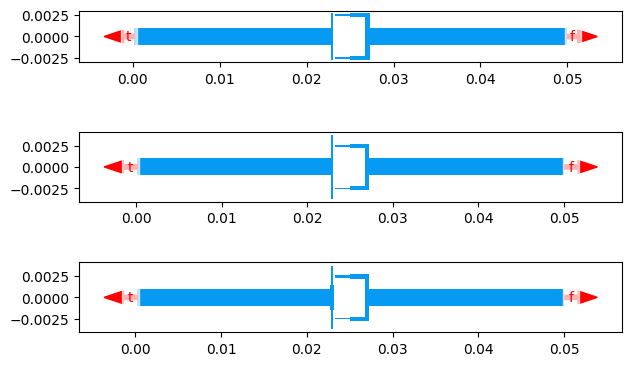

In [7]:
from SQDMetal.Comps.Junctions import JunctionDolanAsymmetric

fig, axs = plt.subplots(nrows=3); fig.set_figwidth(7)
design.delete_all_components()
############################
JunctionDolanAsymmetric(design, 'junction', options=Dict(pos_x=0, pos_y=0,
                                                         squid_width='5.4um', prong_width='0.9um'))
############################

QUtilities.plot_highlight_component('junction', design, arrow_width=0.0005, ax=axs[0])
design.delete_all_components()

#ADD EXTRA BUFFER FINGERS###
JunctionDolanAsymmetric(design, 'junction', options=Dict(pos_x=0, pos_y=0,
                                                         t_pad_extra='1um',
                                                         squid_width='5.4um', prong_width='0.9um'))
############################

QUtilities.plot_highlight_component('junction', design, arrow_width=0.0005, ax=axs[1])
design.delete_all_components()

#ADJUST SIDE FINGER WIDTH###
JunctionDolanAsymmetric(design, 'junction', options=Dict(pos_x=0, pos_y=0,
                                                         finger_width_top='0.4um', finger_width_bottom='0.2um',
                                                         t_pad_width='0.5um', t_pad_length='3um', t_finger_width='0.2um',
                                                         t_pad_extra='1um',
                                                         squid_width='5.4um', prong_width='0.9um'))
############################

QUtilities.plot_highlight_component('junction', design, arrow_width=0.0005, ax=axs[2])

Using relative coordinates

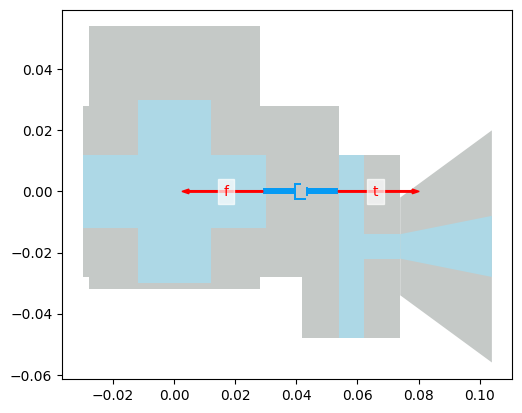

In [19]:
from SQDMetal.Comps.Junctions import JunctionDolanAsymmetricPinStretch

design.delete_all_components()
from SQDMetal.Comps.Xmon import Xmon
from SQDMetal.Comps.Wires import WireTaperPinStretch
from SQDMetal.Comps.FluxLines import FluxLineTPin
design.delete_all_components()
Xmon(design, 'leXmon', options=Dict(pos_x=0, pos_y=0,
                                    vBar_width='24um', hBar_width='24um', vBar_gap='16um', hBar_gap='16um',
                                    cross_width='60um', cross_height='60um',
                                    gap_up='24um', gap_left='0um', gap_right='24um'))

FluxLineTPin(design, 'flux_line_T', options=Dict(ref_comp='leXmon', ref_pin='right',
                                                 width=f'60um',
                                                 trace_width=f'8um',
                                                 trace_gap=f'12um',pin_dist='24um'))
WireTaperPinStretch(design, 'flux_ln_taper', options=Dict(pin_inputs={'start_pin': {'component': 'flux_line_T', 'pin': 'a'}},
                                                   trace_width=f'20um', trace_gap=f'28um', taper_length='50um'))

############################
JunctionDolanAsymmetricPinStretch(design, 'junction', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'flux_line_T',pin='t')),
                                                                   dist_extend='25um',
                                                                   finger_width_top='0.4um', finger_width_bottom='0.2um',
                                                                   t_pad_width='0.5um', t_pad_length='3um', t_finger_width='0.2um',
                                                                   t_pad_extra='1um',
                                                                   squid_width='5.4um', prong_width='0.9um'))
############################

QUtilities.plot_highlight_component('junction', design, arrow_width=0.0005)

## Bounds  <a class="anchor" id="bounds"></a>

### Rectangular bound <a class="anchor" id="bounds-rectangle"></a>

Basic shielding

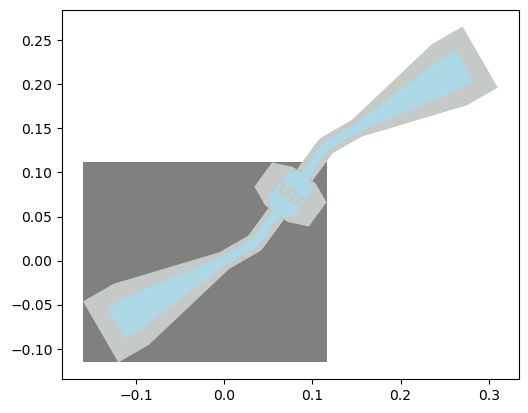

In [5]:
from SQDMetal.Comps.Bounds import BoundRectangle

from SQDMetal.Comps.Capacitors import CapacitorInterdigitalPinPin
from SQDMetal.Comps.Wires import WirePins
from SQDMetal.Comps.Joints import JointExtend
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x='150um', pos_y='150um', orientation='-150', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
JointExtend(design, 'jnt1', options=Dict(jointObj='LP1', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))
JointExtend(design, 'jnt2', options=Dict(jointObj='LP2', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))

CapacitorInterdigitalPinPin(design, 'leCap', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'jnt1',pin='a'), end_pin=Dict(component=f'jnt2',pin='a')),
                                                    cpw_width='15um', len_flat='10um', fing_len='10um', fing_len_gap='4um', fing_wid='4um',
                                                    len_diag='10um', fing_wid_gap='4um', N_total=5, larger_first=True))
WirePins(design, 'lead1', options=Dict(pathObjPins=[('LP1', 'tie'), 'jnt1', ('leCap', 'a')], fillet='10um'))
WirePins(design, 'lead2', options=Dict(pathObjPins=[('LP2', 'tie'), 'jnt2', ('leCap', 'b')], fillet='10um'))

############################
BoundRectangle(design, 'bndRectangle', options=Dict(bnd_objects=['LP1', 'leCap'],
                                                    is_ground_cut=True))
############################

QUtilities.plot_highlight_component('bndRectangle', design, push_to_back=True)

### Ground shields <a class="anchor" id="bounds-gndshield"></a>

Basic shielding

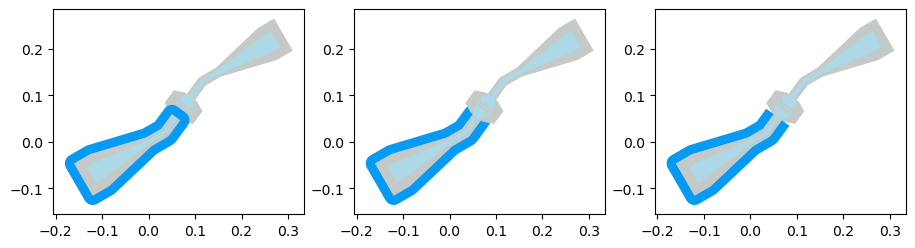

In [3]:
from SQDMetal.Comps.Bounds import BoundGroundShield

from SQDMetal.Comps.Capacitors import CapacitorInterdigitalPinPin

from SQDMetal.Comps.Wires import WirePins
from SQDMetal.Comps.Joints import JointExtend
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x='150um', pos_y='150um', orientation='-150', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
JointExtend(design, 'jnt1', options=Dict(jointObj='LP1', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))
JointExtend(design, 'jnt2', options=Dict(jointObj='LP2', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))

CapacitorInterdigitalPinPin(design, 'leCap', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'jnt1',pin='a'), end_pin=Dict(component=f'jnt2',pin='a')),
                                                    cpw_width='15um', len_flat='10um', fing_len='10um', fing_len_gap='4um', fing_wid='4um',
                                                    len_diag='10um', fing_wid_gap='4um', N_total=5, larger_first=True))
WirePins(design, 'lead1', options=Dict(pathObjPins=[('LP1', 'tie'), 'jnt1', ('leCap', 'a')], fillet='10um'))
WirePins(design, 'lead2', options=Dict(pathObjPins=[('LP2', 'tie'), 'jnt2', ('leCap', 'b')], fillet='10um'))
fig, axs = plt.subplots(ncols=3); fig.set_figwidth(11)

#BASIC ENVELOPE#############
BoundGroundShield(design, 'bndsGround', options=Dict(include_geoms=['lead1', 'LP1'],
                                                     gnd_width='20um'))
############################

QUtilities.plot_highlight_component('bndsGround', design, ax=axs[0])

#EXCLUDE GEOMETRY###########
BoundGroundShield(design, 'bndsGround', options=Dict(include_geoms=['lead1', 'LP1'], exclude_geoms = ['leCap'],
                                                     gnd_width='20um'))
############################

QUtilities.plot_highlight_component('bndsGround', design, ax=axs[1])

#EXCLUDE PIN REGION#########
BoundGroundShield(design, 'bndsGround', options=Dict(include_geoms=['lead1', 'LP1'], exclude_geoms = ['leCap'],
                                                     exclude_pins=[('lead1', 'end', '100um')], gnd_width='20um'))
############################

QUtilities.plot_highlight_component('bndsGround', design, ax=axs[2])

Shielding that scales with the gap-to-metal distance

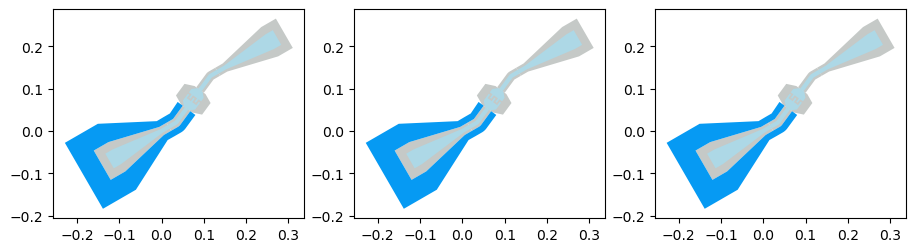

In [48]:
from SQDMetal.Comps.Bounds import BoundGroundShieldScaleGap

from SQDMetal.Comps.Capacitors import CapacitorInterdigitalPinPin

from SQDMetal.Comps.Wires import WirePins
from SQDMetal.Comps.Joints import JointExtend
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x='150um', pos_y='150um', orientation='-150', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='20um'))
JointExtend(design, 'jnt1', options=Dict(jointObj='LP1', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))
JointExtend(design, 'jnt2', options=Dict(jointObj='LP2', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))

CapacitorInterdigitalPinPin(design, 'leCap', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'jnt1',pin='a'), end_pin=Dict(component=f'jnt2',pin='a')),
                                                    cpw_width='15um', len_flat='10um', fing_len='10um', fing_len_gap='4um', fing_wid='4um',
                                                    len_diag='10um', fing_wid_gap='4um', N_total=5, larger_first=True))
WirePins(design, 'lead1', options=Dict(pathObjPins=[('LP1', 'tie'), 'jnt1', ('leCap', 'a')], fillet='10um'))
WirePins(design, 'lead2', options=Dict(pathObjPins=[('LP2', 'tie'), 'jnt2', ('leCap', 'b')], fillet='10um'))
fig, axs = plt.subplots(ncols=3); fig.set_figwidth(11)

#BASIC ENVELOPE#############
BoundGroundShieldScaleGap(design, 'bndsGround', options=Dict(include_geoms=['lead1', 'LP1'],
                                                             gnd_to_gap_scale=2.5))
############################

QUtilities.plot_highlight_component('bndsGround', design, ax=axs[0])

#EXCLUDE GEOMETRY###########
BoundGroundShieldScaleGap(design, 'bndsGround', options=Dict(include_geoms=['lead1', 'LP1'], exclude_geoms = ['leCap'],
                                                             gnd_to_gap_scale=2.5))
############################

QUtilities.plot_highlight_component('bndsGround', design, ax=axs[1])

#EXCLUDE PIN REGION#########
temp = BoundGroundShieldScaleGap(design, 'bndsGround', options=Dict(include_geoms=['lead1', 'LP1'], exclude_geoms = ['leCap'],
                                                             exclude_pins=[('lead1', 'end', '100um')],
                                                             gnd_to_gap_scale=2.5))
############################

QUtilities.plot_highlight_component('bndsGround', design, ax=axs[2])

## Holes  <a class="anchor" id="holes"></a>

### Holes on borders <a class="anchor" id="holes-basic"></a>

Basic borders

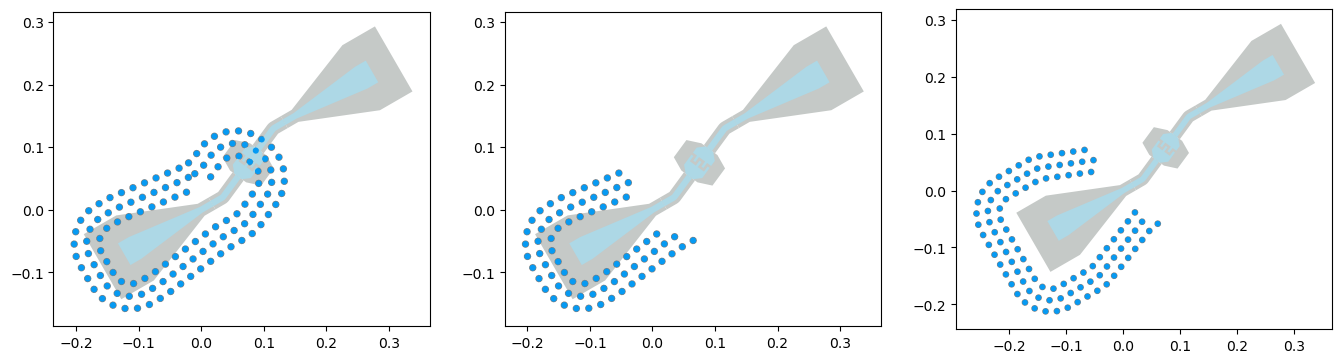

In [2]:
from SQDMetal.Comps.Holes import HoleBorders

from SQDMetal.Comps.Capacitors import CapacitorInterdigitalPinPin
from SQDMetal.Comps.Wires import WirePins
from SQDMetal.Comps.Joints import JointExtend
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
design.delete_all_components()
LaunchpadWirebond(design, 'LP1', options = dict(chip='main', orientation='30', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='40um'))
LaunchpadWirebond(design, 'LP2', options = dict(pos_x='150um', pos_y='150um', orientation='-150', lead_length='20um', pad_height='20um', 
                      pad_width='40um', pad_gap='40um'))
JointExtend(design, 'jnt1', options=Dict(jointObj='LP1', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))
JointExtend(design, 'jnt2', options=Dict(jointObj='LP2', jointPin='tie', dist_extend='20um', extend_off_pin_dir=True))

CapacitorInterdigitalPinPin(design, 'leCap', options=Dict(pin_inputs=Dict(start_pin=Dict(component=f'jnt1',pin='a'), end_pin=Dict(component=f'jnt2',pin='a')),
                                                    cpw_width='15um', len_flat='10um', fing_len='10um', fing_len_gap='4um', fing_wid='4um',
                                                    len_diag='10um', fing_wid_gap='4um', N_total=5, larger_first=True))
WirePins(design, 'lead1', options=Dict(pathObjPins=[('LP1', 'tie'), 'jnt1', ('leCap', 'a')], fillet='10um'))
WirePins(design, 'lead2', options=Dict(pathObjPins=[('LP2', 'tie'), 'jnt2', ('leCap', 'b')], fillet='10um'))
fig, axs = plt.subplots(ncols=3); fig.set_figwidth(16.5)

#BASIC ENVELOPE#############
HoleBorders(design, 'leHoles', options=Dict(hole_radius='5um', dist_holes='20um', dist_init='30um',
                                            num_hole_lines=3, segs_per_circle=12, dist_min='10um',
                                            hole_radius_gnd='6um', border_layers=[1,2,3],
                                            include_geoms=['lead1', 'LP1'], exclude_geoms=[]))
############################

QUtilities.plot_highlight_component('leHoles', design, ax=axs[0])

#EXCLUDE GEOMETRY###########
HoleBorders(design, 'leHoles', options=Dict(hole_radius='5um', dist_holes='20um', dist_init='30um',
                                            num_hole_lines=3, segs_per_circle=12, dist_min='10um',
                                            hole_radius_gnd='6um', border_layers=[1,2,3],
                                            include_geoms=['lead1', 'LP1'], exclude_geoms=['leCap']))
############################

QUtilities.plot_highlight_component('leHoles', design, ax=axs[1])

#EXCLUDE GAPS###############
HoleBorders(design, 'leHoles', options=Dict(hole_radius='5um', dist_holes='20um', dist_init='30um',
                                            num_hole_lines=3, segs_per_circle=12, dist_min='10um',
                                            hole_radius_gnd='6um', border_layers=[1,2,3],
                                            include_geoms=['lead1', 'LP1'], exclude_geoms=['leCap'],
                                            exclude_gaps=True))
############################

QUtilities.plot_highlight_component('leHoles', design, ax=axs[2])